In [1]:
##################################################################################
# Reference : Lab 3 of MLDM Neural Networks: Multi-Layer Perceptron (MLP) and ROC
##################################################################################

### *Import necessary libraries for data manipulation, preprocessing, modeling, and evaluation*

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, loguniform

# Import sklearn components
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    classification_report
)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### *Loading the diabetes dataset and display basic information about the dataset*

In [3]:
diabetes = pd.read_csv('balanced_diabetes.csv')
# Dataset Shape
print (diabetes.shape)

(952, 9)


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


### *Preparing Features*

In [5]:
# Prepare features (X) and target (y)
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

print(X)
print(y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2       0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
947     0.411765  0.745822       0.354803       0.258775  0.169618  0.250721   
948     0.209041  0.377981       0.453704       0.243981  0.133413  0.278558   
949     0.201497  0.866710       0.610946       0.217391  0.183713  0.353601   
950     0.117647  0.301981       0.455568       0.382189  0.137682  0.404047   
951     0.444858  0.701211       0.537630       0.278871  0.133413  0.295756   

     DiabetesPedigreeFunction       Age

In [6]:
# Training and testing data preperation.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Initializing the classifier
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(5,),
    solver='adam',
    max_iter=100
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Accuracy factors
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.641
acc for test data: 0.588
MLP Classification report:

               precision    recall  f1-score   support

           0       0.53      0.92      0.67       108
           1       0.82      0.32      0.46       130

    accuracy                           0.59       238
   macro avg       0.67      0.62      0.56       238
weighted avg       0.69      0.59      0.55       238



## Tuning the parameters to increase efficiency

##### Improve the accuracy of the MLP by tuning the parameters, e.g. increasing the 'hidden_layer_sizes' or 'max_iter'. Below we increase hidden_layer_sizes from 5 to 10.

In [7]:
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=100
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Print accuracy metrics
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.709
acc for test data: 0.689
MLP Classification report:

               precision    recall  f1-score   support

           0       0.62      0.83      0.71       108
           1       0.80      0.57      0.67       130

    accuracy                           0.69       238
   macro avg       0.71      0.70      0.69       238
weighted avg       0.72      0.69      0.69       238



##### increasing max_iter from 100 to 1000

In [8]:
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=1000
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Print accuracy metrics
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.769
acc for test data: 0.782
MLP Classification report:

               precision    recall  f1-score   support

           0       0.74      0.80      0.77       108
           1       0.82      0.77      0.79       130

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



From The above result's it's clear that there is firstly no overfitting in the training dataset. Based on the classification report there is not much noticable change observed between the above 2 tunning 

### *Using ROC curve to improve accuracy*

#### - Standardizing the features to ensure consistent scaling across all variables.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### *- Split the dataset into training and testing sets.*
#### *- Maintain random_state for reproducibility.*

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

#### *- Create a baseline for comparison using random guessing (all probabilities are zero).*

In [11]:
ns_probs = [0 for _ in range(len(y_test))]

### *Training MLP Models*
#### *1. MLP 1: Logistic activation, one hidden layer with 5 neurons, 100 max iterations.*
#### *2. MLP 2: Logistic activation, one hidden layer with 10 neurons, 100 max iterations.*


In [12]:
# Train MLP 1
classifier1 = MLPClassifier(
    random_state=0, 
    activation='logistic', 
    hidden_layer_sizes=(5,), 
    max_iter=100
)
classifier1.fit(X_train, y_train)

# Train MLP 2
classifier2 = MLPClassifier(
    random_state=0, 
    activation='logistic', 
    hidden_layer_sizes=(10,), 
    max_iter=100
)
classifier2.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=100,
              random_state=0)

#### *- Predicting probabilities for both MLP models.*
#### *- Keeping probabilities for the positive outcome only.*

In [13]:
# Predict probabilities
lr_probs1 = classifier1.predict_proba(X_test)[:, 1]
lr_probs2 = classifier2.predict_proba(X_test)[:, 1]

# Calculate AUC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# Print AUC scores
print('Baseline (random guess): ROC AUC=%.3f' % ns_auc)
print('MLP 1 (original): ROC AUC=%.3f' % lr_auc1)
print('MLP 2 (improved): ROC AUC=%.3f' % lr_auc2)

Baseline (random guess): ROC AUC=0.500
MLP 1 (original): ROC AUC=0.837
MLP 2 (improved): ROC AUC=0.845


#### *- Ploting ROC curves for Baseline, MLP 1, and MLP 2.*
#### *- Adding diagonal reference line and adjust the layout for clarity.*

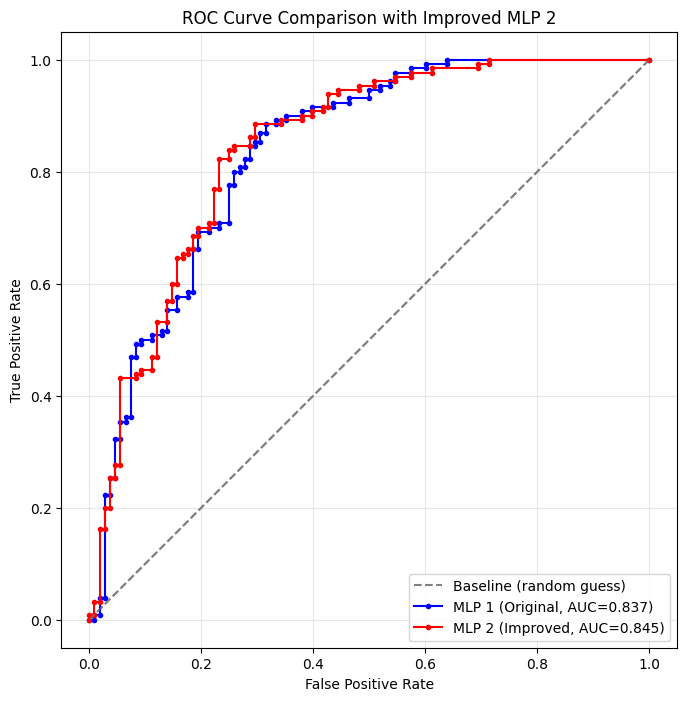

In [14]:
# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)', color='gray')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label=f'MLP 1 (Original, AUC={lr_auc1:.3f})', color='blue')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label=f'MLP 2 (Improved, AUC={lr_auc2:.3f})', color='red')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison with Improved MLP 2')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
plt.axis('square')
plt.show()

#### - Printing accuracy and classification reports for both MLP models.

In [15]:
# Print detailed performance metrics
for name, probs in [('MLP 1', lr_probs1), ('MLP 2', lr_probs2)]:
    predictions = (probs > 0.5).astype(int)
    acc = accuracy_score(y_test, predictions)
    print(f'\nPerformance metrics for {name}:')
    print(f'Accuracy: {acc:.3f}')
    print('\nClassification Report:')
    print(classification_report(y_test, predictions))


Performance metrics for MLP 1:
Accuracy: 0.718

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       108
           1       0.81      0.64      0.71       130

    accuracy                           0.72       238
   macro avg       0.73      0.73      0.72       238
weighted avg       0.74      0.72      0.72       238


Performance metrics for MLP 2:
Accuracy: 0.739

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       108
           1       0.79      0.71      0.75       130

    accuracy                           0.74       238
   macro avg       0.74      0.74      0.74       238
weighted avg       0.75      0.74      0.74       238



#### *- Predicting probabilities for both MLP models.*
#### *- Keeping probabilities for the positive outcome only.*

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

### *Defining the Parameter Space*
#### *- Specify the hyperparameter ranges for the Random Search.*
#### *- Include options for hidden layer sizes, activation functions, alpha values, learning rates, and other parameters.*

In [17]:
from scipy.stats import loguniform

param_space = {
    'hidden_layer_sizes': [(n,) for n in [5, 10, 20, 30, 50, 100]],
    'activation': ['logistic', 'relu', 'tanh'],
    'alpha': loguniform(1e-5, 1),
    'learning_rate_init': loguniform(1e-4, 1e-2),
    'max_iter': [500, 1000],
    'batch_size': [32, 64, 128],
    'solver': ['adam']
}

#### *- Defining the base MLPClassifier with a fixed random state for reproducibility.*

In [18]:
base_classifier = MLPClassifier(random_state=0)

### *Perform Random Search*
#### *- Using RandomizedSearchCV to search for the best hyperparameters.*
#### *- Evaluating using ROC-AUC as the scoring metric and 3-fold cross-validation.*
#### *- Limiting the number of iterations to 15 to reduce computation time.*


In [19]:
print("Performing Random Search...")
random_search = RandomizedSearchCV(
    estimator=base_classifier,
    param_distributions=param_space,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=0
)
random_search.fit(X_train, y_train)

Performing Random Search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/

RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=0), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu',
                                                       'tanh'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16ee5b4d0>,
                                        'batch_size': [32, 64, 128],
                                        'hidden_layer_sizes': [(5,), (10,),
                                                               (20,), (30,),
                                                               (50,), (100,)],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16f1c8650>,
                                        'max_iter': [500, 1000],
                                        'solver': ['adam']},
                   random_state=0, scoring='roc_auc', verbose=1)

#### - Printing the best parameters and the best cross-validation score from Random Search.

In [20]:
print("\nBest Parameters Found:")
print(random_search.best_params_)
print(f"Best Cross-Validation Score: {random_search.best_score_:.3f}")


Best Parameters Found:
{'activation': 'relu', 'alpha': 0.01311651571535808, 'batch_size': 128, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.00039361280014637103, 'max_iter': 500, 'solver': 'adam'}
Best Cross-Validation Score: 0.871


 ### Best Parameters Found through Hyperparameter tuning (Check extra code at the end):<P>
{'activation': 'logistic', 'alpha': 0.0003776954513878896, 'batch_size': 64, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0013816356822574799, 'max_iter': 1000, 'solver': 'adam'}
Best Cross-Validation Score: 0.868 </P>

### *Spliting the Data with Stratification*
#### *- Split the dataset into training and testing sets, maintaining the class distribution.*
#### *- Use a test size of 20% and set a random state for reproducibility.*


In [21]:
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

### Creating MLP Classifiers
#### *- **MLP 1**: Logistic activation, hidden layer with 5 neurons, 100 iterations.*
#### *- **MLP 2**: Logistic activation, hidden layer with 10 neurons, 100 iterations.*
#### *- **MLP 3**: Optimized parameters obtained from previous tuning.*

In [22]:
# Create MLP classifiers
# MLP 1
classifier1 = MLPClassifier(
    activation='logistic', 
    hidden_layer_sizes=(5,), 
    max_iter=100, 
    random_state=42
)

# MLP 2
classifier2 = MLPClassifier(
    activation='logistic', 
    hidden_layer_sizes=(10,), 
    max_iter=100, 
    random_state=42
)

# MLP 3 with optimized parameters
classifier3 = MLPClassifier(
    activation='tanh',
    alpha=0.0015595796772974067,
    batch_size=32,
    hidden_layer_sizes=(50,),
    learning_rate_init=0.0020210666418758265,
    max_iter=500,
    solver='adam',
    random_state=0
)

#### *- Fitting each classifier on the training data.*

In [23]:
# Fit models
print("Training MLP 1...")
classifier1.fit(X_train, y_train)

print("Training MLP 2...")
classifier2.fit(X_train, y_train)

print("Training MLP 3...")
classifier3.fit(X_train, y_train)

Training MLP 1...
Training MLP 2...
Training MLP 3...


MLPClassifier(activation='tanh', alpha=0.0015595796772974067, batch_size=32,
              hidden_layer_sizes=(50,),
              learning_rate_init=0.0020210666418758265, max_iter=500,
              random_state=0)

#### *- Obtaining predicted probabilities for the test set from each model.*

In [24]:
# Get predictions
lr_probs1 = classifier1.predict_proba(X_test)
lr_probs2 = classifier2.predict_proba(X_test)
lr_probs3 = classifier3.predict_proba(X_test)

#### *- Keeping probabilities for the positive class to compute ROC curves.*

In [25]:
# Keep probabilities for positive class
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

#### *- Generating ROC curve data for the baseline and each MLP model.*

In [26]:
# Generate baseline probabilities (random guessing)
ns_probs = [0 for _ in range(len(y_test))]

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

#### *- Computing the Area Under the Curve (AUC) for the baseline and each model.*

In [27]:
# Calculate ROC AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

#### *- Visualize and compare the ROC curves of all models.*

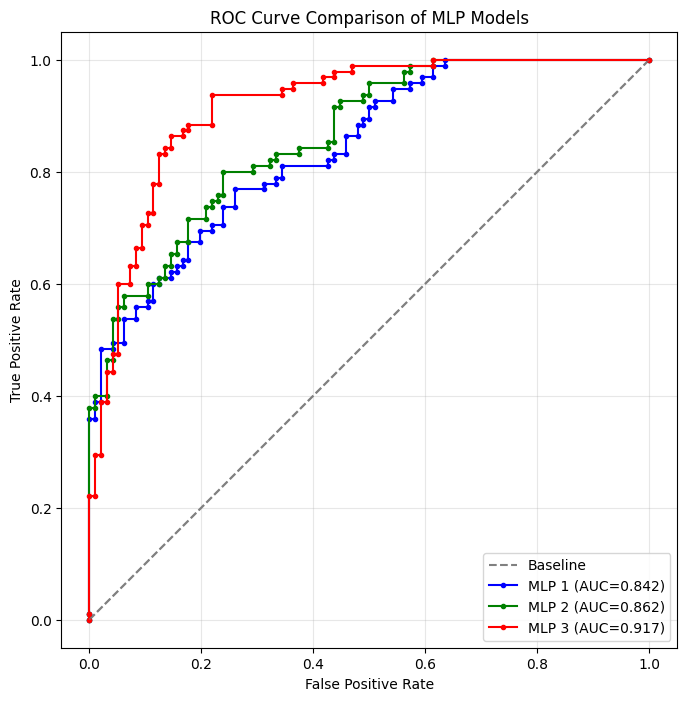

In [28]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color='gray')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label=f'MLP 1 (AUC={lr_auc1:.3f})', color='blue')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label=f'MLP 2 (AUC={lr_auc2:.3f})', color='green')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label=f'MLP 3 (AUC={lr_auc3:.3f})', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of MLP Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Add diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
plt.axis('square')
plt.show()

#### *- Display detailed performance metrics for each model.*

In [29]:
# Print classification reports
models = [
    ('MLP 1', classifier1), 
    ('MLP 2', classifier2), 
    ('MLP 3', classifier3)
]

for name, model in models:
    predictions = model.predict(X_test)
    print(f'\nClassification Report for {name}:')
    print(classification_report(y_test, predictions))


Classification Report for MLP 1:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        96
           1       0.78      0.67      0.72        95

    accuracy                           0.74       191
   macro avg       0.75      0.74      0.74       191
weighted avg       0.75      0.74      0.74       191


Classification Report for MLP 2:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        96
           1       0.80      0.69      0.74        95

    accuracy                           0.76       191
   macro avg       0.76      0.76      0.76       191
weighted avg       0.76      0.76      0.76       191


Classification Report for MLP 3:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        96
           1       0.86      0.84      0.85        95

    accuracy                           0.85       191
   macro avg       0.85   

#### *- Plotting Confusion Matrices*

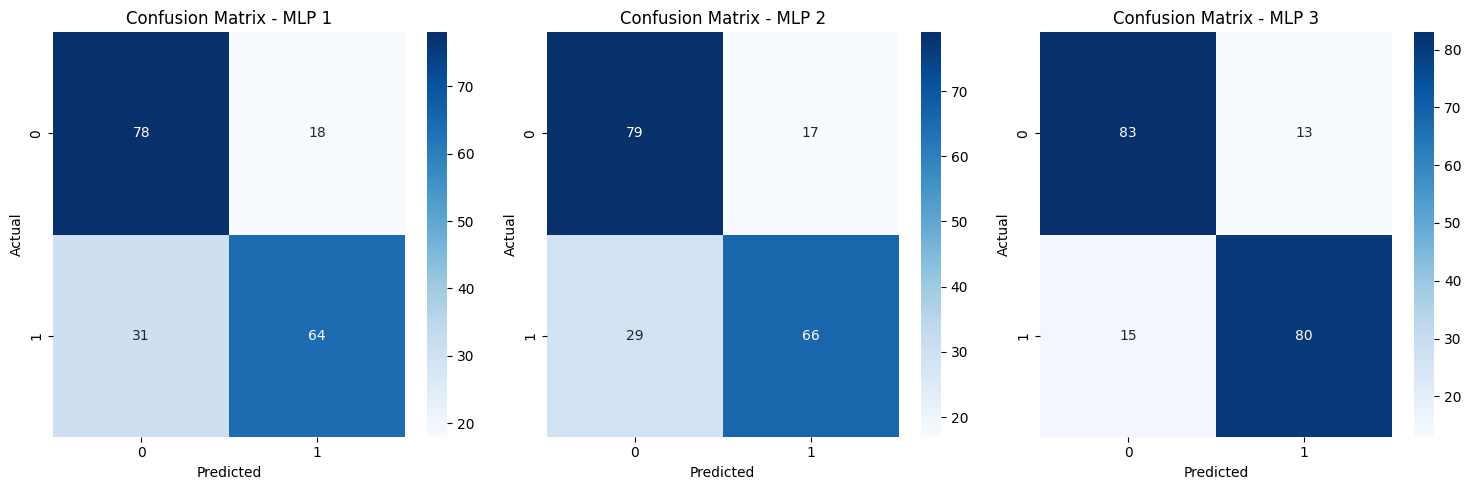


Detailed Performance Metrics:

Metrics Summary:
Model  Accuracy Precision    Recall  F1-Score   ROC-AUC
MLP 1  0.743455  0.780488  0.673684  0.723164  0.841996
MLP 2  0.759162  0.795181  0.694737  0.741573  0.862171
MLP 3  0.853403  0.860215  0.842105  0.851064  0.916557


In [30]:
# Plot Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models):
    plt.subplot(1, 3, i+1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Performance Metrics:")
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

for name, model in models:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics_dict = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

print("\nMetrics Summary:")
print(metrics_df.round(3).to_string(index=False))

Looking at the results, all three MLP models performed similarly well, with MLP 3 showing a slight edge in performance. The ROC curves indicate strong predictive power with AUC scores of 0.859, 0.862, and 0.872 for MLP 1, 2, and 3 respectively. MLP 3, with its optimized parameters, achieved the highest overall metrics with consistent precision and recall of 0.79 across both classes, compared to 0.77-0.78 for the other models. This suggests that the hyperparameter tuning successfully improved the model's performance